In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use('seaborn-white')
# colorblind safe
plt.style.use('seaborn-colorblind')
plt.style.use('tableau-colorblind10')

# width and precision for f strings
width = 10
precision = 4

# default sizes for plots
# https://matplotlib.org/3.3.0/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

# other settings
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import os
G_MAPS_API = os.environ.get("GOOGLE_STATICMAPS_API")

In [37]:
import random, time

In [38]:
import googlemaps

In [39]:
gmaps = googlemaps.Client(G_MAPS_API)

In [40]:
n_requests = 0

In [41]:
def download_images(client, df, zoomlevel, max_requests=10, prefix="", out_path="data/"):
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    
    global n_requests
    
    for i, site in df.iterrows():
        print(f'Pulling image {i}, total API requests so far = {n_requests}')
        #print(f"{site['Latitude']}, {site['Longitude']}")
        
        # temp save coords
        lat = site['Latitude']
        long = site['Longitude']
        
        # and tags for site
        cat = site['Category']
        
        # create filename
        cur_filename = f'satimg_{prefix}_{i}_{cat}_{zoomlevel}_{lat}_{long}.png'
        print(cur_filename)

        # if it already exists, skip to next
        if os.path.exists(out_path + cur_filename):
            continue

        # get the image
        satimg = client.static_map(size = (400, 400), # pixels
           zoom = zoomlevel, # 1-21
           center = (lat, long),
           scale = 1, # default is 1, 2 returns 2x pixels for high res displays
           maptype = "satellite",
           format = "png"
          )
        
        # if it didn't work, exit
        if satimg is None or n_requests >= max_requests:
            print("API requests quota exceeded!")    
            break
        # increase counter otherwise
        n_requests += 1
        
        # save the current image
        f = open(out_path + cur_filename, 'wb')
        for chunk in satimg:
            if chunk:
                f.write(chunk)
        f.close()
        
        # open it to crop the text off
        img = plt.imread(out_path + cur_filename)
        # maybe crop all 4 sides?
        cropped = img[25:375, 25:375]
        # and resave
        #cropped_filename = f'satimg_{i}_{cat}_{zoomlevel}_{lat}_{long}.png'
        plt.imsave(out_path + cur_filename, cropped)
        
        # and rotate and save that version
        for k, degrees in enumerate([90, 180, 270]):
            #print(k, degrees)
            cropped_rotated = np.rot90(cropped, k=k)
            cropped_rot_filename = f'satimg_{prefix}_{i}_{cat}_{zoomlevel}_{lat}_{long}_rot{degrees}.png'
            #print(cropped_rot_filename)
            plt.imsave(out_path + cropped_rot_filename, cropped_rotated)
        
        # and zoom in and save
#         zoomed = img[100:300, 100:300]
#         zoomed_cropped_filename = f'satimg_{i}_{cat}_{zoomlevel}_zoomed_{lat}_{long}.png'
#         plt.imsave(out_path + zoomed_cropped_filename, zoomed)
        
#         # and rotate on zoom in and save
#         zoomed_rot = np.rot90(zoomed)
#         zoomed_cropped_rot_filename = f'satimg_{i}_{cat}_{zoomlevel}_zoomed_rot90_{lat}_{long}.png'
#         plt.imsave(out_path + zoomed_cropped_rot_filename, zoomed_rot)
        
        # wait a bit before next request
        wait_time = random.randint(1, 5)
        print(f'waiting for: {wait_time} seconds')
        time.sleep(wait_time) # in seconds

        # display samples every now and then
        if i % 100 == 0:
            img = plt.imread(out_path + cur_filename)
            plt.imshow(img)
            plt.title(f'image {i}')
            plt.show()
            time.sleep(2)
    return True

In [46]:
USdata_cleaned = pd.read_csv('data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')
USdata = pd.read_csv('data/USdata_zip_states_combined_cleaned.csv')
to_combine = [USdata_cleaned, USdata]
USdata_with_est_campgrounds = pd.concat(to_combine)
USdata_with_est_campgrounds.to_csv('data/USdata_est_campgrounds_zip_states_combined_cleaned.csv')

In [47]:
categories = list(USdata_with_est_campgrounds['Category'].unique())
categories

['Established Campground',
 'Wild Camping',
 'Informal Campsite',
 'Showers',
 'Water',
 'Short-term Parking',
 'Eco-Friendly']

In [54]:
USdata_with_est_campgrounds.groupby('State').agg('count')['Description'].sort_values(ascending=False).head(20)

State
CA    1698
AZ     886
OR     729
CO     707
WA     692
UT     651
TX     576
FL     465
AK     452
MT     446
NM     426
ID     383
WY     298
NV     285
NY     197
VA     161
NC     157
TN     152
MI     144
SD     144
Name: Description, dtype: int64

In [55]:
names = ['TX', 'FL', 'AK', 'MT', 'NM', 'ID', 'WY', 'NV', 'NY']

Wild Camping
Pulling image 0, total API requests so far = 0
satimg_CO__0_Wild Camping_17_37.238067_-107.524203.png
waiting for: 3 seconds


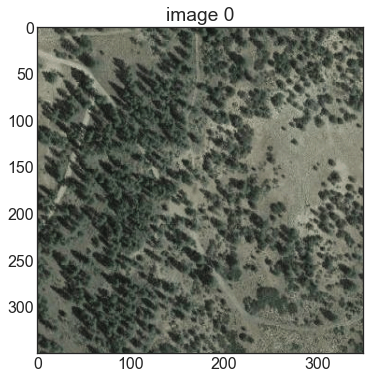

Pulling image 1, total API requests so far = 1
satimg_CO__1_Wild Camping_17_37.812975_-107.905482.png
waiting for: 5 seconds
Pulling image 4, total API requests so far = 2
satimg_CO__4_Wild Camping_17_39.39521_-108.106147.png
waiting for: 2 seconds
Pulling image 5, total API requests so far = 3
satimg_CO__5_Wild Camping_17_38.838421_-107.517971.png
waiting for: 3 seconds
Pulling image 9, total API requests so far = 4
satimg_CO__9_Wild Camping_17_39.307964_-108.702567.png
waiting for: 1 seconds
Pulling image 10, total API requests so far = 5
satimg_CO__10_Wild Camping_17_39.092332_-108.808072.png
waiting for: 4 seconds
Pulling image 11, total API requests so far = 6
satimg_CO__11_Wild Camping_17_38.776797_-108.288448.png
waiting for: 5 seconds
Pulling image 13, total API requests so far = 7
satimg_CO__13_Wild Camping_17_39.368473_-106.786083.png
waiting for: 2 seconds
Pulling image 14, total API requests so far = 8
satimg_CO__14_Wild Camping_17_40.244703_-104.05243.png
waiting for: 4 se

waiting for: 4 seconds
Pulling image 86, total API requests so far = 66
satimg_CO__86_Wild Camping_17_39.8346_-106.05345.png
waiting for: 2 seconds
Pulling image 87, total API requests so far = 67
satimg_CO__87_Wild Camping_17_39.01828_-105.18099.png
waiting for: 2 seconds
Pulling image 90, total API requests so far = 68
satimg_CO__90_Wild Camping_17_39.772194_-105.762246.png
waiting for: 5 seconds
Pulling image 93, total API requests so far = 69
satimg_CO__93_Wild Camping_17_39.100859_-106.368014.png
waiting for: 2 seconds
Pulling image 94, total API requests so far = 70
satimg_CO__94_Wild Camping_17_39.151353_-106.425406.png
waiting for: 3 seconds
Pulling image 95, total API requests so far = 71
satimg_CO__95_Wild Camping_17_40.165868_-105.457831.png
waiting for: 4 seconds
Pulling image 96, total API requests so far = 72
satimg_CO__96_Wild Camping_17_40.139004_-106.105506.png
waiting for: 4 seconds
Pulling image 97, total API requests so far = 73
satimg_CO__97_Wild Camping_17_39.2467

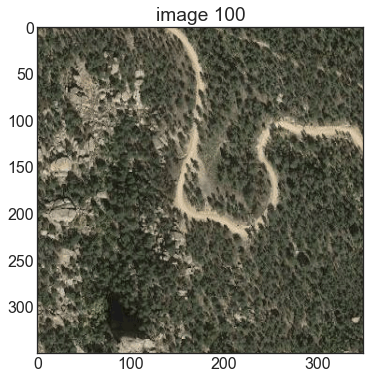

Pulling image 105, total API requests so far = 77
satimg_CO__105_Wild Camping_17_38.06261_-107.66027.png
waiting for: 3 seconds
Pulling image 106, total API requests so far = 78
satimg_CO__106_Wild Camping_17_38.53206_-102.52848.png
waiting for: 2 seconds
Pulling image 108, total API requests so far = 79
satimg_CO__108_Wild Camping_17_37.75222_-107.97693999999998.png
waiting for: 2 seconds
Pulling image 109, total API requests so far = 80
satimg_CO__109_Wild Camping_17_37.66889000000001_-108.32528.png
waiting for: 3 seconds
Pulling image 110, total API requests so far = 81
satimg_CO__110_Wild Camping_17_38.04722_-107.80917.png
waiting for: 2 seconds
Pulling image 111, total API requests so far = 82
satimg_CO__111_Wild Camping_17_38.92778_-107.27472.png
waiting for: 1 seconds
Pulling image 112, total API requests so far = 83
satimg_CO__112_Wild Camping_17_38.972505_-103.460771.png
waiting for: 5 seconds
Pulling image 113, total API requests so far = 84
satimg_CO__113_Wild Camping_17_37.

waiting for: 4 seconds
Pulling image 198, total API requests so far = 140
satimg_CO__198_Wild Camping_17_39.57495_-106.110771.png
waiting for: 2 seconds
Pulling image 199, total API requests so far = 141
satimg_CO__199_Wild Camping_17_37.720631_-107.749573.png
waiting for: 3 seconds
Pulling image 200, total API requests so far = 142
satimg_CO__200_Wild Camping_17_38.943307_-106.186081.png
waiting for: 5 seconds


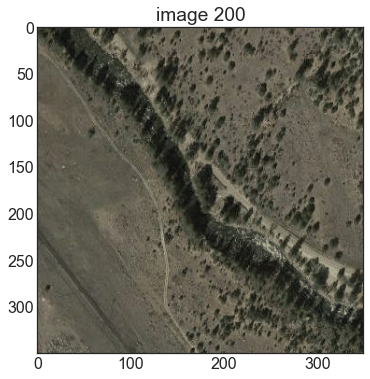

Pulling image 201, total API requests so far = 143
satimg_CO__201_Wild Camping_17_39.41959600000001_-106.272577.png
waiting for: 2 seconds
Pulling image 202, total API requests so far = 144
satimg_CO__202_Wild Camping_17_39.622652_-106.907416.png
waiting for: 2 seconds
Pulling image 205, total API requests so far = 145
satimg_CO__205_Wild Camping_17_40.124126_-105.532433.png
waiting for: 5 seconds
Pulling image 206, total API requests so far = 146
satimg_CO__206_Wild Camping_17_39.350404_-106.585145.png
waiting for: 2 seconds
Pulling image 208, total API requests so far = 147
satimg_CO__208_Wild Camping_17_39.513834_-106.428997.png
waiting for: 1 seconds
Pulling image 211, total API requests so far = 148
satimg_CO__211_Wild Camping_17_39.32121_-105.251605.png
waiting for: 4 seconds
Pulling image 212, total API requests so far = 149
satimg_CO__212_Wild Camping_17_37.394388_-108.06817.png
waiting for: 3 seconds
Pulling image 213, total API requests so far = 150
satimg_CO__213_Wild Campin

waiting for: 3 seconds
Pulling image 282, total API requests so far = 206
satimg_CO__282_Wild Camping_17_38.49635900000001_-105.028626.png
waiting for: 5 seconds
Pulling image 283, total API requests so far = 207
satimg_CO__283_Wild Camping_17_39.822497_-108.828981.png
waiting for: 3 seconds
Pulling image 284, total API requests so far = 208
satimg_CO__284_Wild Camping_17_37.800821_-107.577759.png
waiting for: 4 seconds
Pulling image 286, total API requests so far = 209
satimg_CO__286_Wild Camping_17_40.051488_-105.735293.png
waiting for: 5 seconds
Pulling image 289, total API requests so far = 210
satimg_CO__289_Wild Camping_17_37.4998_-106.763231.png
waiting for: 5 seconds
Pulling image 291, total API requests so far = 211
satimg_CO__291_Wild Camping_17_39.566972_-107.317933.png
waiting for: 4 seconds
Pulling image 293, total API requests so far = 212
satimg_CO__293_Wild Camping_17_39.24003_-106.23385.png
waiting for: 4 seconds
Pulling image 296, total API requests so far = 213
satim

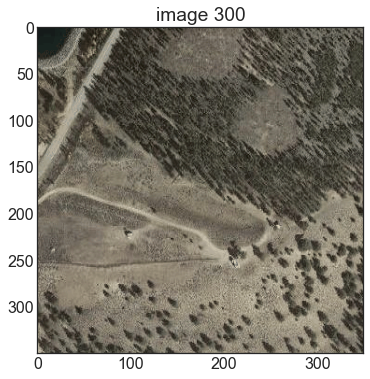

Pulling image 301, total API requests so far = 218
satimg_CO__301_Wild Camping_17_39.106134_-106.383417.png
waiting for: 4 seconds
Pulling image 304, total API requests so far = 219
satimg_CO__304_Wild Camping_17_37.59268400000001_-108.940319.png
waiting for: 2 seconds
Pulling image 305, total API requests so far = 220
satimg_CO__305_Wild Camping_17_38.375386_-108.733312.png
waiting for: 5 seconds
Pulling image 307, total API requests so far = 221
satimg_CO__307_Wild Camping_17_40.525327_-104.996499.png
waiting for: 3 seconds
Pulling image 308, total API requests so far = 222
satimg_CO__308_Wild Camping_17_39.43395_-106.05963.png
waiting for: 5 seconds
Pulling image 311, total API requests so far = 223
satimg_CO__311_Wild Camping_17_39.120114_-105.451712.png
waiting for: 2 seconds
Pulling image 317, total API requests so far = 224
satimg_CO__317_Wild Camping_17_39.672669_-104.982995.png
waiting for: 2 seconds
Pulling image 320, total API requests so far = 225
satimg_CO__320_Wild Campin

waiting for: 5 seconds
Pulling image 400, total API requests so far = 281
satimg_CO__400_Wild Camping_17_37.367449_-107.894099.png
waiting for: 4 seconds


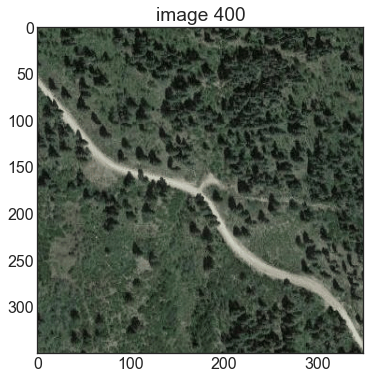

Pulling image 401, total API requests so far = 282
satimg_CO__401_Wild Camping_17_37.908767_-107.600666.png
waiting for: 4 seconds
Pulling image 402, total API requests so far = 283
satimg_CO__402_Wild Camping_17_37.25113_-105.129078.png
waiting for: 2 seconds
Pulling image 403, total API requests so far = 284
satimg_CO__403_Wild Camping_17_40.384146_-106.623231.png
waiting for: 5 seconds
Pulling image 404, total API requests so far = 285
satimg_CO__404_Wild Camping_17_40.873977_-106.220514.png
waiting for: 4 seconds
Pulling image 405, total API requests so far = 286
satimg_CO__405_Wild Camping_17_39.544466_-106.139692.png
waiting for: 3 seconds
Pulling image 406, total API requests so far = 287
satimg_CO__406_Wild Camping_17_39.520037_-106.146201.png
waiting for: 3 seconds
Pulling image 407, total API requests so far = 288
satimg_CO__407_Wild Camping_17_38.744911_-106.20488600000002.png
waiting for: 4 seconds
Pulling image 408, total API requests so far = 289
satimg_CO__408_Wild Campi

waiting for: 2 seconds
Pulling image 481, total API requests so far = 345
satimg_CO__481_Wild Camping_17_37.654373_-107.801874.png
waiting for: 1 seconds
Pulling image 482, total API requests so far = 346
satimg_CO__482_Wild Camping_17_37.36806_-108.17618.png
waiting for: 4 seconds
Pulling image 483, total API requests so far = 347
satimg_CO__483_Wild Camping_17_37.397024_-108.821426.png
waiting for: 4 seconds
Pulling image 484, total API requests so far = 348
satimg_CO__484_Wild Camping_17_37.8655_-105.41042.png
waiting for: 1 seconds
Pulling image 485, total API requests so far = 349
satimg_CO__485_Wild Camping_17_40.56707_-105.36362.png
waiting for: 1 seconds
Pulling image 486, total API requests so far = 350
satimg_CO__486_Wild Camping_17_39.06547_-108.751857.png
waiting for: 3 seconds
Pulling image 488, total API requests so far = 351
satimg_CO__488_Wild Camping_17_37.821788_-107.720018.png
waiting for: 5 seconds
Pulling image 489, total API requests so far = 352
satimg_CO__489_Wi

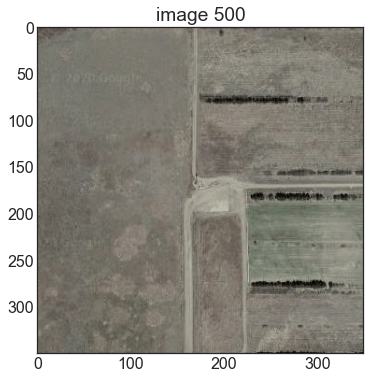

Pulling image 503, total API requests so far = 361
satimg_CO__503_Wild Camping_17_37.102043_-105.384856.png
waiting for: 4 seconds
Pulling image 505, total API requests so far = 362
satimg_CO__505_Wild Camping_17_38.064366_-107.667477.png
waiting for: 5 seconds
Pulling image 506, total API requests so far = 363
satimg_CO__506_Wild Camping_17_39.399604_-108.812415.png
waiting for: 1 seconds
Pulling image 507, total API requests so far = 364
satimg_CO__507_Wild Camping_17_37.37492_-106.965934.png
waiting for: 1 seconds
Pulling image 508, total API requests so far = 365
satimg_CO__508_Wild Camping_17_38.767902_-106.765822.png
waiting for: 2 seconds
Pulling image 509, total API requests so far = 366
satimg_CO__509_Wild Camping_17_38.17458_-105.15155.png
waiting for: 5 seconds
Pulling image 510, total API requests so far = 367
satimg_CO__510_Wild Camping_17_39.439804_-106.397395.png
waiting for: 5 seconds
Pulling image 512, total API requests so far = 368
satimg_CO__512_Wild Camping_17_38.8

waiting for: 3 seconds
Pulling image 138, total API requests so far = 423
satimg_CO__138_Informal Campsite_17_39.582525_-105.360861.png
waiting for: 2 seconds
Pulling image 139, total API requests so far = 424
satimg_CO__139_Informal Campsite_17_38.49984_-106.23237.png
waiting for: 2 seconds
Pulling image 144, total API requests so far = 425
satimg_CO__144_Informal Campsite_17_39.695973_-104.832612.png
waiting for: 3 seconds
Pulling image 148, total API requests so far = 426
satimg_CO__148_Informal Campsite_17_39.737853_-104.527413.png
waiting for: 1 seconds
Pulling image 157, total API requests so far = 427
satimg_CO__157_Informal Campsite_17_39.59194_-104.861127.png
waiting for: 3 seconds
Pulling image 158, total API requests so far = 428
satimg_CO__158_Informal Campsite_17_39.179792_-109.021499.png
waiting for: 1 seconds
Pulling image 161, total API requests so far = 429
satimg_CO__161_Informal Campsite_17_37.954387_-107.828845.png
waiting for: 4 seconds
Pulling image 166, total API

waiting for: 5 seconds
Pulling image 490, total API requests so far = 484
satimg_CO__490_Informal Campsite_17_38.524514_-106.021702.png
waiting for: 2 seconds
Pulling image 494, total API requests so far = 485
satimg_CO__494_Informal Campsite_17_37.998948_-103.593968.png
waiting for: 3 seconds
Pulling image 499, total API requests so far = 486
satimg_CO__499_Informal Campsite_17_38.50578_-106.951536.png
waiting for: 3 seconds
Pulling image 501, total API requests so far = 487
satimg_CO__501_Informal Campsite_17_38.093897_-103.054223.png
waiting for: 4 seconds
Pulling image 502, total API requests so far = 488
satimg_CO__502_Informal Campsite_17_37.26902000000001_-106.99716.png
waiting for: 2 seconds
Pulling image 504, total API requests so far = 489
satimg_CO__504_Informal Campsite_17_37.361218_-108.07808.png
waiting for: 2 seconds
Pulling image 511, total API requests so far = 490
satimg_CO__511_Informal Campsite_17_37.169603_-105.517145.png
waiting for: 1 seconds
Pulling image 513, t

waiting for: 5 seconds
Pulling image 383, total API requests so far = 548
satimg_CO__383_Eco-Friendly_17_38.82507_-106.13977.png
waiting for: 2 seconds
Pulling image 395, total API requests so far = 549
satimg_CO__395_Eco-Friendly_17_39.387498_-107.083325.png
waiting for: 4 seconds


In [25]:
# for category in categories:
#     print(category)
#     tempdf = USdata_CO[USdata_CO['Category'] == category]
#     #tempdf.info()
#     download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix="CO", out_path=f"data/sites_CO/{category}/")

In [57]:
# USdata_CA = USdata_cleaned[USdata_cleaned['State'] == 'CA'].copy()
# USdata_AZ = USdata_cleaned[USdata_cleaned['State'] == 'AZ'].copy()
# USdata_OR = USdata_cleaned[USdata_cleaned['State'] == 'OR'].copy()
# USdata_UT = USdata_cleaned[USdata_cleaned['State'] == 'UT'].copy()
# USdata_WA = USdata_cleaned[USdata_cleaned['State'] == 'WA'].copy()


USdata_TX = USdata_cleaned[USdata_cleaned['State'] == 'TX'].copy()
USdata_FL = USdata_cleaned[USdata_cleaned['State'] == 'FL'].copy()
USdata_AK = USdata_cleaned[USdata_cleaned['State'] == 'AK'].copy()
USdata_MT = USdata_cleaned[USdata_cleaned['State'] == 'MT'].copy()
USdata_NM = USdata_cleaned[USdata_cleaned['State'] == 'NM'].copy()
USdata_ID = USdata_cleaned[USdata_cleaned['State'] == 'ID'].copy()
USdata_WY = USdata_cleaned[USdata_cleaned['State'] == 'WY'].copy()
USdata_NV = USdata_cleaned[USdata_cleaned['State'] == 'NV'].copy()
USdata_NY = USdata_cleaned[USdata_cleaned['State'] == 'NY'].copy()
# maybe TX, AK, NM

In [58]:
state_dfs = [USdata_TX,  
            USdata_FL,
            USdata_AK,
            USdata_MT,
            USdata_NM,
            USdata_ID,
            USdata_WY, 
            USdata_NV,
            USdata_NY]

In [33]:
max_requests = 10_000

Established Campground
TX
Pulling image 32, total API requests so far = 0
satimg_TX_32_Established Campground_17_31.895257_-104.825458.png
waiting for: 2 seconds
Pulling image 33, total API requests so far = 1
satimg_TX_33_Established Campground_17_29.321089_-103.593007.png
waiting for: 5 seconds
Pulling image 42, total API requests so far = 2
satimg_TX_42_Established Campground_17_30.10051_-95.65317.png
waiting for: 2 seconds
Pulling image 43, total API requests so far = 3
satimg_TX_43_Established Campground_17_30.967379_-103.713992.png
waiting for: 4 seconds
Pulling image 44, total API requests so far = 4
satimg_TX_44_Established Campground_17_26.075112_-97.164425.png
waiting for: 2 seconds
Pulling image 45, total API requests so far = 5
satimg_TX_45_Established Campground_17_29.834802000000003_-94.686255.png
waiting for: 4 seconds
Pulling image 48, total API requests so far = 6
satimg_TX_48_Established Campground_17_30.261977_-97.760559.png
waiting for: 1 seconds
Pulling image 49, t

waiting for: 2 seconds
Pulling image 654, total API requests so far = 60
satimg_TX_654_Established Campground_17_30.56536_-98.1936.png
waiting for: 1 seconds
Pulling image 753, total API requests so far = 61
satimg_TX_753_Established Campground_17_26.585207_-99.147925.png
waiting for: 5 seconds
Pulling image 879, total API requests so far = 62
satimg_TX_879_Established Campground_17_35.534584_-100.303479.png
waiting for: 3 seconds
Pulling image 883, total API requests so far = 63
satimg_TX_883_Established Campground_17_26.23873_-98.40034.png
waiting for: 5 seconds
Pulling image 889, total API requests so far = 64
satimg_TX_889_Established Campground_17_31.567390000000003_-95.16346.png
waiting for: 1 seconds
Pulling image 890, total API requests so far = 65
satimg_TX_890_Established Campground_17_31.3395_-96.30854.png
waiting for: 4 seconds
Pulling image 891, total API requests so far = 66
satimg_TX_891_Established Campground_17_31.44814_-96.37747.png
waiting for: 5 seconds
Pulling imag

waiting for: 5 seconds
Pulling image 1292, total API requests so far = 119
satimg_TX_1292_Established Campground_17_35.70565300000001_-101.564626.png
waiting for: 1 seconds
Pulling image 1300, total API requests so far = 120
satimg_TX_1300_Established Campground_17_29.343911_-98.881768.png
waiting for: 4 seconds


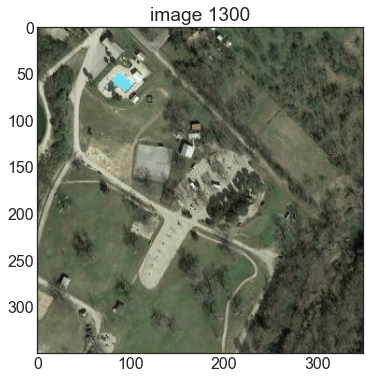

Pulling image 1352, total API requests so far = 121
satimg_TX_1352_Established Campground_17_29.31961_-103.532239.png
waiting for: 5 seconds
Pulling image 1366, total API requests so far = 122
satimg_TX_1366_Established Campground_17_32.008665_-97.451495.png
waiting for: 3 seconds
Pulling image 1435, total API requests so far = 123
satimg_TX_1435_Established Campground_17_30.503013_-99.780913.png
waiting for: 2 seconds
Pulling image 1551, total API requests so far = 124
satimg_TX_1551_Established Campground_17_30.607661_-103.950441.png
waiting for: 5 seconds
Pulling image 1731, total API requests so far = 125
satimg_TX_1731_Established Campground_17_34.909095_-102.118695.png
waiting for: 1 seconds
Pulling image 1932, total API requests so far = 126
satimg_TX_1932_Established Campground_17_29.308947_-94.768292.png
waiting for: 4 seconds
Pulling image 1937, total API requests so far = 127
satimg_TX_1937_Established Campground_17_29.675587_-94.044181.png
waiting for: 5 seconds
Pulling ima

waiting for: 3 seconds
Pulling image 3013, total API requests so far = 179
satimg_TX_3013_Established Campground_17_31.393143_-95.155328.png
waiting for: 5 seconds
Pulling image 3051, total API requests so far = 180
satimg_TX_3051_Established Campground_17_29.757775_-94.674725.png
waiting for: 5 seconds
Pulling image 3063, total API requests so far = 181
satimg_TX_3063_Established Campground_17_30.366202_-103.639613.png
waiting for: 2 seconds
Pulling image 3074, total API requests so far = 182
satimg_TX_3074_Established Campground_17_33.993295_-101.342081.png
waiting for: 4 seconds
Pulling image 3078, total API requests so far = 183
satimg_TX_3078_Established Campground_17_31.19723_-98.7061.png
waiting for: 5 seconds
Pulling image 3079, total API requests so far = 184
satimg_TX_3079_Established Campground_17_30.65103_-99.25.png
waiting for: 2 seconds
Pulling image 3080, total API requests so far = 185
satimg_TX_3080_Established Campground_17_30.65103_-99.25.png
waiting for: 2 seconds
P

waiting for: 3 seconds
Pulling image 3388, total API requests so far = 237
satimg_TX_3388_Established Campground_17_30.52369_-98.368834.png
waiting for: 2 seconds
Pulling image 3391, total API requests so far = 238
satimg_TX_3391_Established Campground_17_33.048442_-101.083974.png
waiting for: 3 seconds
Pulling image 3417, total API requests so far = 239
satimg_TX_3417_Established Campground_17_30.486101_-98.087446.png
waiting for: 4 seconds
Pulling image 3424, total API requests so far = 240
satimg_TX_3424_Established Campground_17_31.747338_-106.34153.png
waiting for: 2 seconds
Pulling image 3425, total API requests so far = 241
satimg_TX_3425_Established Campground_17_27.790099_-99.457618.png
waiting for: 2 seconds
Pulling image 3502, total API requests so far = 242
satimg_TX_3502_Established Campground_17_31.260990000000003_-93.67912.png
waiting for: 2 seconds
Pulling image 3616, total API requests so far = 243
satimg_TX_3616_Established Campground_17_28.13618_-96.987209.png
waitin

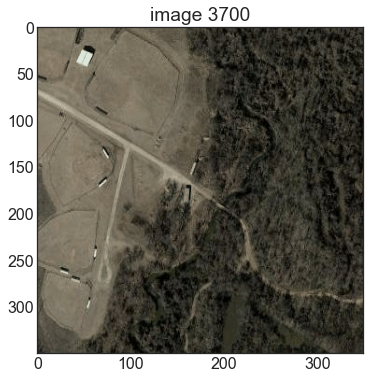

Wild Camping
TX
Informal Campsite
TX
Showers
TX
Water
TX
Short-term Parking
TX
Eco-Friendly
TX
Established Campground
FL
Pulling image 40, total API requests so far = 245
satimg_FL_40_Established Campground_17_30.13389_-85.738877.png
waiting for: 2 seconds
Pulling image 90, total API requests so far = 246
satimg_FL_90_Established Campground_17_30.31339_-87.41515.png
waiting for: 5 seconds
Pulling image 194, total API requests so far = 247
satimg_FL_194_Established Campground_17_28.5069_-81.484302.png
waiting for: 1 seconds
Pulling image 195, total API requests so far = 248
satimg_FL_195_Established Campground_17_27.727335_-80.777339.png
waiting for: 3 seconds
Pulling image 258, total API requests so far = 249
satimg_FL_258_Established Campground_17_29.012013_-81.636966.png
waiting for: 4 seconds
Pulling image 285, total API requests so far = 250
satimg_FL_285_Established Campground_17_30.02621_-84.56582.png
waiting for: 3 seconds
Pulling image 310, total API requests so far = 251
satim

waiting for: 1 seconds
Pulling image 1190, total API requests so far = 303
satimg_FL_1190_Established Campground_17_25.136776_-80.940101.png
waiting for: 2 seconds
Pulling image 1191, total API requests so far = 304
satimg_FL_1191_Established Campground_17_29.919019_-81.420963.png
waiting for: 1 seconds
Pulling image 1194, total API requests so far = 305
satimg_FL_1194_Established Campground_17_27.566351_-82.5636.png
waiting for: 4 seconds
Pulling image 1220, total API requests so far = 306
satimg_FL_1220_Established Campground_17_28.407233_-80.59425.png
waiting for: 3 seconds
Pulling image 1267, total API requests so far = 307
satimg_FL_1267_Established Campground_17_26.990132_-80.142623.png
waiting for: 2 seconds
Pulling image 1280, total API requests so far = 308
satimg_FL_1280_Established Campground_17_30.49887_-86.42568.png
waiting for: 3 seconds
Pulling image 1297, total API requests so far = 309
satimg_FL_1297_Established Campground_17_30.239688_-82.435916.png
waiting for: 4 sec

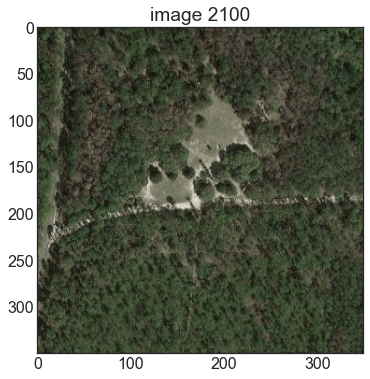

Pulling image 2101, total API requests so far = 345
satimg_FL_2101_Established Campground_17_30.322628_-82.558673.png
waiting for: 2 seconds
Pulling image 2105, total API requests so far = 346
satimg_FL_2105_Established Campground_17_25.893557_-81.229941.png
waiting for: 5 seconds
Pulling image 2120, total API requests so far = 347
satimg_FL_2120_Established Campground_17_30.4067_-81.411916.png
waiting for: 1 seconds
Pulling image 2121, total API requests so far = 348
satimg_FL_2121_Established Campground_17_30.458040000000004_-81.42116999999998.png
waiting for: 1 seconds
Pulling image 2125, total API requests so far = 349
satimg_FL_2125_Established Campground_17_28.304753_-81.364049.png
waiting for: 5 seconds
Pulling image 2130, total API requests so far = 350
satimg_FL_2130_Established Campground_17_30.315339_-86.093425.png
waiting for: 5 seconds
Pulling image 2144, total API requests so far = 351
satimg_FL_2144_Established Campground_17_28.1484_-82.27816.png
waiting for: 3 seconds
P

waiting for: 5 seconds
Pulling image 3272, total API requests so far = 403
satimg_FL_3272_Established Campground_17_30.239203000000003_-82.435592.png
waiting for: 5 seconds
Pulling image 3276, total API requests so far = 404
satimg_FL_3276_Established Campground_17_28.904902000000003_-82.306898.png
waiting for: 3 seconds
Pulling image 3294, total API requests so far = 405
satimg_FL_3294_Established Campground_17_28.245737_-82.422852.png
waiting for: 3 seconds
Pulling image 3298, total API requests so far = 406
satimg_FL_3298_Established Campground_17_28.32375_-82.57059.png
waiting for: 4 seconds
Pulling image 3311, total API requests so far = 407
satimg_FL_3311_Established Campground_17_30.80201_-86.76829000000002.png
waiting for: 1 seconds
Pulling image 3316, total API requests so far = 408
satimg_FL_3316_Established Campground_17_29.209208_-83.063193.png
waiting for: 2 seconds
Pulling image 3317, total API requests so far = 409
satimg_FL_3317_Established Campground_17_28.253159000000

waiting for: 4 seconds
Pulling image 781, total API requests so far = 460
satimg_AK_781_Established Campground_17_63.335911_-142.965996.png
waiting for: 2 seconds
Pulling image 782, total API requests so far = 461
satimg_AK_782_Established Campground_17_60.133196_-149.429799.png
waiting for: 4 seconds
Pulling image 783, total API requests so far = 462
satimg_AK_783_Established Campground_17_60.133196_-149.429799.png
waiting for: 4 seconds
Pulling image 861, total API requests so far = 463
satimg_AK_861_Established Campground_17_63.733006_-148.89728300000004.png
waiting for: 3 seconds
Pulling image 1028, total API requests so far = 464
satimg_AK_1028_Established Campground_17_60.958322_-149.111734.png
waiting for: 4 seconds
Pulling image 1068, total API requests so far = 465
satimg_AK_1068_Established Campground_17_62.718327_-143.96090800000005.png
waiting for: 1 seconds
Pulling image 1328, total API requests so far = 466
satimg_AK_1328_Established Campground_17_62.888205000000006_-141.

waiting for: 2 seconds
Pulling image 2561, total API requests so far = 517
satimg_AK_2561_Established Campground_17_60.07550300000001_-149.441572.png
waiting for: 3 seconds
Pulling image 2562, total API requests so far = 518
satimg_AK_2562_Established Campground_17_64.838943_-147.809415.png
waiting for: 2 seconds
Pulling image 2565, total API requests so far = 519
satimg_AK_2565_Established Campground_17_65.054146_-146.05674399999995.png
waiting for: 4 seconds
Pulling image 2573, total API requests so far = 520
satimg_AK_2573_Established Campground_17_62.027496_-150.072477.png
waiting for: 2 seconds
Pulling image 2576, total API requests so far = 521
satimg_AK_2576_Established Campground_17_60.930478_-149.664147.png
waiting for: 2 seconds
Pulling image 2581, total API requests so far = 522
satimg_AK_2581_Established Campground_17_60.321767_-151.28623100000004.png
waiting for: 1 seconds
Pulling image 2587, total API requests so far = 523
satimg_AK_2587_Established Campground_17_60.18075

waiting for: 2 seconds
Pulling image 281, total API requests so far = 574
satimg_MT_281_Established Campground_17_48.253014_-114.252056.png
waiting for: 1 seconds
Pulling image 291, total API requests so far = 575
satimg_MT_291_Established Campground_17_48.752982_-113.442826.png
waiting for: 1 seconds
Pulling image 343, total API requests so far = 576
satimg_MT_343_Established Campground_17_45.172485_-111.242344.png
waiting for: 3 seconds
Pulling image 354, total API requests so far = 577
satimg_MT_354_Established Campground_17_45.883054_-110.880743.png
waiting for: 4 seconds
Pulling image 360, total API requests so far = 578
satimg_MT_360_Established Campground_17_48.94873_-115.50388999999998.png
waiting for: 2 seconds
Pulling image 424, total API requests so far = 579
satimg_MT_424_Established Campground_17_48.38598_-114.071893.png
waiting for: 4 seconds
Pulling image 442, total API requests so far = 580
satimg_MT_442_Established Campground_17_48.067028_-115.925119.png
waiting for: 5

Pulling image 1557, total API requests so far = 632
satimg_MT_1557_Established Campground_17_45.917989_-111.502117.png
waiting for: 2 seconds
Pulling image 1563, total API requests so far = 633
satimg_MT_1563_Established Campground_17_45.546871_-112.692707.png
waiting for: 3 seconds
Pulling image 1570, total API requests so far = 634
satimg_MT_1570_Established Campground_17_45.48706_-110.6211.png
waiting for: 4 seconds
Pulling image 1576, total API requests so far = 635
satimg_MT_1576_Established Campground_17_46.989669_-114.66283500000002.png
waiting for: 2 seconds
Pulling image 1581, total API requests so far = 636
satimg_MT_1581_Established Campground_17_47.318628_-114.894806.png
waiting for: 5 seconds
Pulling image 1610, total API requests so far = 637
satimg_MT_1610_Established Campground_17_45.294047_-111.926297.png
waiting for: 3 seconds
Pulling image 1618, total API requests so far = 638
satimg_MT_1618_Established Campground_17_45.598635_-111.570666.png
waiting for: 5 seconds
P

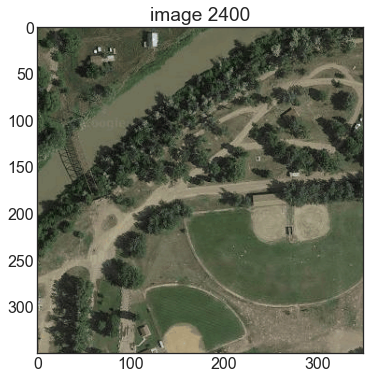

Pulling image 2407, total API requests so far = 673
satimg_MT_2407_Established Campground_17_47.079677_-114.765649.png
waiting for: 4 seconds
Pulling image 2410, total API requests so far = 674
satimg_MT_2410_Established Campground_17_46.246952_-105.750526.png
waiting for: 2 seconds
Pulling image 2442, total API requests so far = 675
satimg_MT_2442_Established Campground_17_46.76570200000001_-111.649728.png
waiting for: 1 seconds
Pulling image 2535, total API requests so far = 676
satimg_MT_2535_Established Campground_17_48.676069_-113.819544.png
waiting for: 4 seconds
Pulling image 2545, total API requests so far = 677
satimg_MT_2545_Established Campground_17_47.38636500000001_-115.398619.png
waiting for: 1 seconds
Pulling image 2548, total API requests so far = 678
satimg_MT_2548_Established Campground_17_46.470942_-113.236303.png
waiting for: 1 seconds
Pulling image 2567, total API requests so far = 679
satimg_MT_2567_Established Campground_17_46.024882_-114.178946.png
waiting for: 

waiting for: 3 seconds
Pulling image 3563, total API requests so far = 731
satimg_MT_3563_Established Campground_17_48.943809_-114.890045.png
waiting for: 1 seconds
Pulling image 3578, total API requests so far = 732
satimg_MT_3578_Established Campground_17_46.280275_-112.940299.png
waiting for: 3 seconds
Pulling image 3579, total API requests so far = 733
satimg_MT_3579_Established Campground_17_46.426919_-112.484099.png
waiting for: 3 seconds
Pulling image 3591, total API requests so far = 734
satimg_MT_3591_Established Campground_17_47.308981_-113.577017.png
waiting for: 4 seconds
Pulling image 3596, total API requests so far = 735
satimg_MT_3596_Established Campground_17_45.612038_-111.57044.png
waiting for: 1 seconds
Pulling image 3604, total API requests so far = 736
satimg_MT_3604_Established Campground_17_46.489345_-111.524726.png
waiting for: 2 seconds
Pulling image 3610, total API requests so far = 737
satimg_MT_3610_Established Campground_17_48.562306_-115.973873.png
waiting

waiting for: 2 seconds
Pulling image 976, total API requests so far = 789
satimg_NM_976_Established Campground_17_36.826528_-107.616965.png
waiting for: 1 seconds
Pulling image 977, total API requests so far = 790
satimg_NM_977_Established Campground_17_36.036705_-107.890227.png
waiting for: 3 seconds
Pulling image 1026, total API requests so far = 791
satimg_NM_1026_Established Campground_17_32.116523_-104.45625.png
waiting for: 1 seconds
Pulling image 1073, total API requests so far = 792
satimg_NM_1073_Established Campground_17_35.265596_-105.334353.png
waiting for: 2 seconds
Pulling image 1108, total API requests so far = 793
satimg_NM_1108_Established Campground_17_32.564155_-104.381388.png
waiting for: 3 seconds
Pulling image 1113, total API requests so far = 794
satimg_NM_1113_Established Campground_17_32.817411_-107.936558.png
waiting for: 5 seconds
Pulling image 1118, total API requests so far = 795
satimg_NM_1118_Established Campground_17_33.332581_-104.331594.png
waiting for

waiting for: 4 seconds
Pulling image 2413, total API requests so far = 847
satimg_NM_2413_Established Campground_17_36.532999_-105.265385.png
waiting for: 5 seconds
Pulling image 2447, total API requests so far = 848
satimg_NM_2447_Established Campground_17_33.448141_-105.665367.png
waiting for: 5 seconds
Pulling image 2467, total API requests so far = 849
satimg_NM_2467_Established Campground_17_32.944002000000005_-105.725481.png
waiting for: 2 seconds
Pulling image 2468, total API requests so far = 850
satimg_NM_2468_Established Campground_17_32.966792_-105.729189.png
waiting for: 2 seconds
Pulling image 2699, total API requests so far = 851
satimg_NM_2699_Established Campground_17_35.72595_-105.83614.png
waiting for: 3 seconds
Pulling image 2780, total API requests so far = 852
satimg_NM_2780_Established Campground_17_32.088766_-104.432238.png
waiting for: 2 seconds
Pulling image 2898, total API requests so far = 853
satimg_NM_2898_Established Campground_17_35.58878400000001_-106.04

waiting for: 3 seconds
Pulling image 1377, total API requests so far = 904
satimg_ID_1377_Established Campground_17_44.385611_-114.260319.png
waiting for: 4 seconds
Pulling image 1378, total API requests so far = 905
satimg_ID_1378_Established Campground_17_44.345944_-114.267195.png
waiting for: 2 seconds
Pulling image 1379, total API requests so far = 906
satimg_ID_1379_Established Campground_17_44.297921_-116.089626.png
waiting for: 1 seconds
Pulling image 1389, total API requests so far = 907
satimg_ID_1389_Established Campground_17_46.227003_-115.474256.png
waiting for: 5 seconds
Pulling image 1412, total API requests so far = 908
satimg_ID_1412_Established Campground_17_43.808268_-117.020619.png
waiting for: 3 seconds
Pulling image 1480, total API requests so far = 909
satimg_ID_1480_Established Campground_17_43.59626_-113.36289.png
waiting for: 5 seconds
Pulling image 1490, total API requests so far = 910
satimg_ID_1490_Established Campground_17_47.6078_-116.669047.png
waiting fo

waiting for: 5 seconds
Pulling image 3020, total API requests so far = 962
satimg_ID_3020_Established Campground_17_46.723665_-116.984254.png
waiting for: 4 seconds
Pulling image 3026, total API requests so far = 963
satimg_ID_3026_Established Campground_17_42.429168_-112.178086.png
waiting for: 3 seconds
Pulling image 3358, total API requests so far = 964
satimg_ID_3358_Established Campground_17_42.554164_-114.573622.png
waiting for: 1 seconds
Pulling image 3395, total API requests so far = 965
satimg_ID_3395_Established Campground_17_47.634494_-116.285191.png
waiting for: 1 seconds
Pulling image 3397, total API requests so far = 966
satimg_ID_3397_Established Campground_17_44.703149_-113.29468500000002.png
waiting for: 3 seconds
Pulling image 3409, total API requests so far = 967
satimg_ID_3409_Established Campground_17_44.24563300000001_-115.005372.png
waiting for: 5 seconds
Pulling image 3411, total API requests so far = 968
satimg_ID_3411_Established Campground_17_42.322744_-114.2

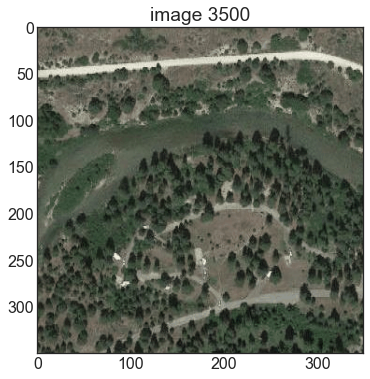

Pulling image 3501, total API requests so far = 974
satimg_ID_3501_Established Campground_17_43.299109_-116.521979.png
waiting for: 3 seconds
Pulling image 3511, total API requests so far = 975
satimg_ID_3511_Established Campground_17_42.905957_-115.71851.png
waiting for: 3 seconds
Pulling image 3525, total API requests so far = 976
satimg_ID_3525_Established Campground_17_42.53142800000001_-113.966802.png
waiting for: 1 seconds
Pulling image 3529, total API requests so far = 977
satimg_ID_3529_Established Campground_17_43.267897_-114.377063.png
waiting for: 3 seconds
Pulling image 3534, total API requests so far = 978
satimg_ID_3534_Established Campground_17_44.419374_-111.372199.png
waiting for: 5 seconds
Pulling image 3547, total API requests so far = 979
satimg_ID_3547_Established Campground_17_43.870896_-111.867612.png
waiting for: 3 seconds
Pulling image 3553, total API requests so far = 980
satimg_ID_3553_Established Campground_17_44.108647_-115.595549.png
waiting for: 1 seconds

waiting for: 4 seconds
Pulling image 1357, total API requests so far = 1032
satimg_WY_1357_Established Campground_17_43.015424_-110.122027.png
waiting for: 1 seconds
Pulling image 1376, total API requests so far = 1033
satimg_WY_1376_Established Campground_17_44.376409_-104.772451.png
waiting for: 4 seconds
Pulling image 1380, total API requests so far = 1034
satimg_WY_1380_Established Campground_17_44.588802_-104.699005.png
waiting for: 3 seconds
Pulling image 1431, total API requests so far = 1035
satimg_WY_1431_Established Campground_17_44.089355_-110.69589.png
waiting for: 5 seconds
Pulling image 1441, total API requests so far = 1036
satimg_WY_1441_Established Campground_17_44.45236_-109.757903.png
waiting for: 3 seconds
Pulling image 1607, total API requests so far = 1037
satimg_WY_1607_Established Campground_17_42.072345_-110.151121.png
waiting for: 2 seconds
Pulling image 1614, total API requests so far = 1038
satimg_WY_1614_Established Campground_17_44.539241_-110.430565999999

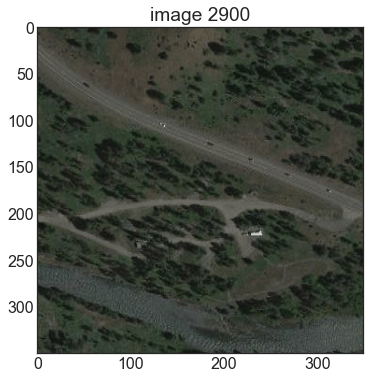

Pulling image 2923, total API requests so far = 1069
satimg_WY_2923_Established Campground_17_42.936615_-109.760501.png
waiting for: 5 seconds
Pulling image 3072, total API requests so far = 1070
satimg_WY_3072_Established Campground_17_40.931326_-110.403419.png
waiting for: 4 seconds
Pulling image 3107, total API requests so far = 1071
satimg_WY_3107_Established Campground_17_43.563364_-109.460252.png
waiting for: 5 seconds
Pulling image 3290, total API requests so far = 1072
satimg_WY_3290_Established Campground_17_43.52014000000001_-110.83892.png
waiting for: 1 seconds
Pulling image 3396, total API requests so far = 1073
satimg_WY_3396_Established Campground_17_44.319687_-106.9499.png
waiting for: 2 seconds
Pulling image 3402, total API requests so far = 1074
satimg_WY_3402_Established Campground_17_41.180033_-105.251214.png
waiting for: 3 seconds
Pulling image 3432, total API requests so far = 1075
satimg_WY_3432_Established Campground_17_43.824598_-110.356133.png
waiting for: 5 se

waiting for: 5 seconds
Pulling image 2022, total API requests so far = 1126
satimg_NV_2022_Established Campground_17_40.467541_-118.309065.png
waiting for: 5 seconds
Pulling image 2119, total API requests so far = 1127
satimg_NV_2119_Established Campground_17_36.11689000000001_-115.063843.png
waiting for: 1 seconds
Pulling image 2140, total API requests so far = 1128
satimg_NV_2140_Established Campground_17_40.84861_-115.746057.png
waiting for: 1 seconds
Pulling image 2168, total API requests so far = 1129
satimg_NV_2168_Established Campground_17_38.808099_-119.228621.png
waiting for: 2 seconds
Pulling image 2184, total API requests so far = 1130
satimg_NV_2184_Established Campground_17_39.498547_-115.956545.png
waiting for: 3 seconds
Pulling image 2194, total API requests so far = 1131
satimg_NV_2194_Established Campground_17_36.06005_-115.562149.png
waiting for: 2 seconds
Pulling image 2245, total API requests so far = 1132
satimg_NV_2245_Established Campground_17_36.94604_-116.71679

waiting for: 5 seconds
Pulling image 1822, total API requests so far = 1183
satimg_NY_1822_Established Campground_17_43.678367_-74.787663.png
waiting for: 3 seconds
Pulling image 1823, total API requests so far = 1184
satimg_NY_1823_Established Campground_17_43.679842_-74.784586.png
waiting for: 1 seconds
Pulling image 1824, total API requests so far = 1185
satimg_NY_1824_Established Campground_17_43.68115_-74.777489.png
waiting for: 1 seconds
Pulling image 1825, total API requests so far = 1186
satimg_NY_1825_Established Campground_17_43.684863_-74.769586.png
waiting for: 3 seconds
Pulling image 1826, total API requests so far = 1187
satimg_NY_1826_Established Campground_17_43.684567_-74.767895.png
waiting for: 2 seconds
Pulling image 1827, total API requests so far = 1188
satimg_NY_1827_Established Campground_17_43.684791_-74.76629399999999.png
waiting for: 3 seconds
Pulling image 1828, total API requests so far = 1189
satimg_NY_1828_Established Campground_17_43.686189_-74.747437.png

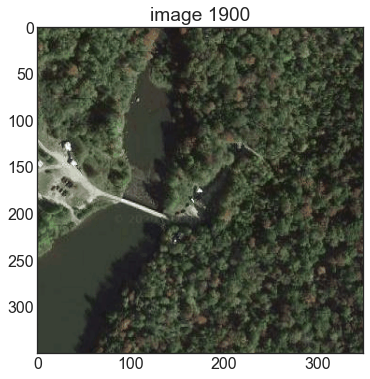

Pulling image 2334, total API requests so far = 1217
satimg_NY_2334_Established Campground_17_43.80811_-73.48841999999998.png
waiting for: 5 seconds
Pulling image 2343, total API requests so far = 1218
satimg_NY_2343_Established Campground_17_44.350593_-73.861151.png
waiting for: 1 seconds
Pulling image 2392, total API requests so far = 1219
satimg_NY_2392_Established Campground_17_43.34615_-76.68903.png
waiting for: 3 seconds
Pulling image 2490, total API requests so far = 1220
satimg_NY_2490_Established Campground_17_41.979539_-74.846491.png
waiting for: 5 seconds
Pulling image 2519, total API requests so far = 1221
satimg_NY_2519_Established Campground_17_42.48499_-76.80765699999998.png
waiting for: 4 seconds
Pulling image 2611, total API requests so far = 1222
satimg_NY_2611_Established Campground_17_43.073248_-77.302767.png
waiting for: 1 seconds
Pulling image 2647, total API requests so far = 1223
satimg_NY_2647_Established Campground_17_42.48361_-76.79916999999998.png
waiting fo

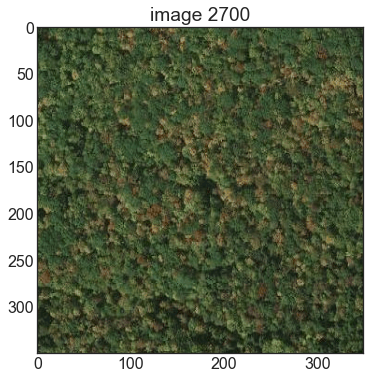

Pulling image 2716, total API requests so far = 1225
satimg_NY_2716_Established Campground_17_42.386796_-77.00199599999998.png
waiting for: 4 seconds
Pulling image 2717, total API requests so far = 1226
satimg_NY_2717_Established Campground_17_42.330426_-77.023924.png
waiting for: 5 seconds
Pulling image 2768, total API requests so far = 1227
satimg_NY_2768_Established Campground_17_42.39076_-76.99873000000002.png
waiting for: 4 seconds
Pulling image 2786, total API requests so far = 1228
satimg_NY_2786_Established Campground_17_44.72323400000001_-73.422372.png
waiting for: 4 seconds
Pulling image 3394, total API requests so far = 1229
satimg_NY_3394_Established Campground_17_43.923467_-75.625979.png
waiting for: 1 seconds
Pulling image 3521, total API requests so far = 1230
satimg_NY_3521_Established Campground_17_43.673503_-74.682167.png
waiting for: 4 seconds
Pulling image 3522, total API requests so far = 1231
satimg_NY_3522_Established Campground_17_43.80375_-74.701164.png
waiting

In [60]:
for name, state in zip(names, state_dfs):
    for category in categories:
        print(category)
        tempdf = state[state['Category'] == category]
        #tempdf.info()
        print(name)
        download_images(gmaps, tempdf, max_requests=max_requests, zoomlevel=17, prefix=f'{name}', out_path=f"data/sites_{name}/{category}/")